In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import re
import random

def randomColor():
    from random import choice
    color = "#" + "".join([choice("0123456789ABCDEF") for j in range(6)])
    return color

In [2]:

sns.set_theme(style="darkgrid")
mp.rc('font', family='Malgun Gothic')

In [3]:
file = './tickets.csv'

In [4]:
# 데이터 로딩
# 데이터에서 불필요한 요소를 drop 하고 미리 날자 관련 데이터는 미리 파싱되도록 처리

df = pd.read_csv(file, parse_dates=['tran_date','play_date', 'pre_open_date', 'open_date'], )
df.tail()
df = df[df['place'] == '콘서트홀']
df.drop(columns=['membership_type_6', 'place'], inplace=True)




In [5]:
# 타임만 있는 데이터의 경우 수동으로 파싱되도록 처리함
df['play_st_time'] = pd.to_timedelta(df['play_st_time'])
# change tran_time to datetime dtype as %H%M
df['tran_time'] =  pd.to_timedelta(df['tran_time'])

# 카테고리화가 가능한 데이터는 한번에 카테고리화 함
categorized = ['performance_code', 'genre', 'seat', 'ticket_cancel', 'discount_type','gender']
df[categorized] = df[categorized].astype('category')

In [6]:

df[['member_yn']] = df[['member_yn']].replace({'Y':True, 'N':False})
df_mem_type = [ 'membership_type_1',
 'membership_type_2',
 'membership_type_3',
 'membership_type_4',
 'membership_type_5']
df[df_mem_type] = df[df_mem_type].astype('category') 


df.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 1096968 entries, 0 to 1920864
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype          
---  ------             --------------    -----          
 0   age                484517 non-null   float64        
 1   gender             484867 non-null   category       
 2   membership_type_1  484867 non-null   category       
 3   membership_type_2  389737 non-null   category       
 4   membership_type_3  140468 non-null   category       
 5   membership_type_4  25160 non-null    category       
 6   membership_type_5  1110 non-null     category       
 7   tran_date          1096968 non-null  datetime64[ns] 
 8   tran_time          1096968 non-null  timedelta64[ns]
 9   play_date          1096968 non-null  datetime64[ns] 
 10  play_st_time       1096968 non-null  timedelta64[ns]
 11  seat               1096968 non-null  category       
 12  price              1096968 non-null  int64          
 13  ticket_cancel    

In [7]:
columns = ['age',
 'gender',
 'membership_type_1',
 'membership_type_2',
 'membership_type_3',
 'membership_type_4',
 'membership_type_5',
 'membership_type_6',
 'tran_date',
 'tran_time',
 'play_date',
 'play_st_time',
 'seat',
 'price',
 'ticket_cancel',
 'discount_type',
 'performance_code',
 'pre_open_date',
 'open_date',
 'genre',
 'place',
 'running_time',
 'intermission',
 'member_yn']

hangul = [
'나이',
'성별',
'멤버십종류1',
'멤버십종류2',
'멤버십종류3',
'멤버십종류4',
'멤버십종류5',
'멤버십종류6',
'예매 거래일자',
'예매 거래시간',
'공연날짜',
'공연시작시간',
'좌석번호',
'최종예매가격',
'예매취소여부',
'할인내역',
'공연명 코드',
'선예매시작일',
'예매시작일',
'장르',
'러닝타임',
'휴게시간',
'회원여부'
]
df.rename(dict(zip(columns, hangul)), axis='columns', inplace=True)

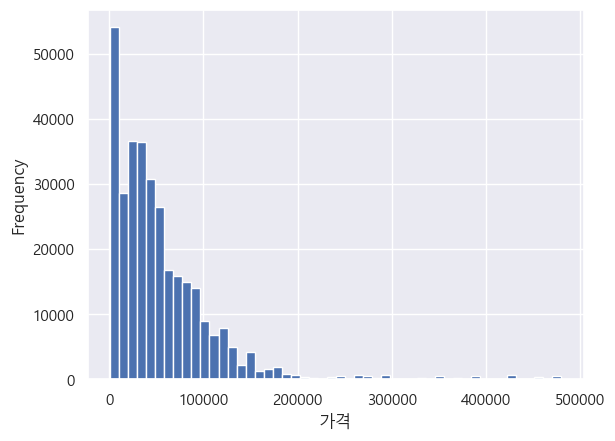

In [8]:
df[df['회원여부']& df['최종예매가격'].gt(0)]['최종예매가격'].plot(kind='hist', bins=50)
plt.xlabel("가격")
plt.show()

<Axes: ylabel='Frequency'>

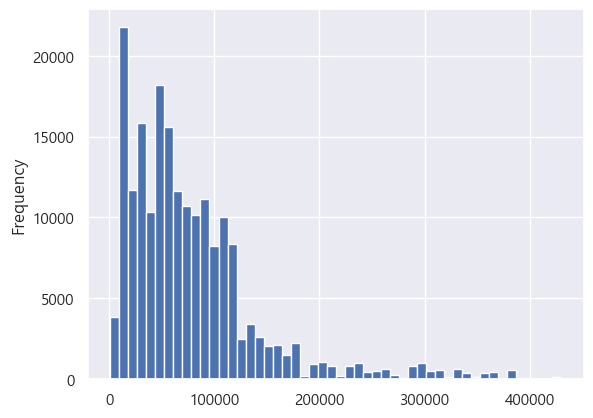

In [9]:
df[~df['회원여부'] & df['최종예매가격'].gt(0) ]['최종예매가격'].plot(kind='hist', bins=50)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096968 entries, 0 to 1920864
Data columns (total 22 columns):
 #   Column     Non-Null Count    Dtype          
---  ------     --------------    -----          
 0   나이         484517 non-null   float64        
 1   성별         484867 non-null   category       
 2   멤버십종류1     484867 non-null   category       
 3   멤버십종류2     389737 non-null   category       
 4   멤버십종류3     140468 non-null   category       
 5   멤버십종류4     25160 non-null    category       
 6   멤버십종류5     1110 non-null     category       
 7   예매 거래일자    1096968 non-null  datetime64[ns] 
 8   예매 거래시간    1096968 non-null  timedelta64[ns]
 9   공연날짜       1096968 non-null  datetime64[ns] 
 10  공연시작시간     1096968 non-null  timedelta64[ns]
 11  좌석번호       1096968 non-null  category       
 12  최종예매가격     1096968 non-null  int64          
 13  예매취소여부     1096968 non-null  category       
 14  할인내역       1096968 non-null  category       
 15  공연명 코드     1096968 non-null  category

In [11]:
df = df[df['공연날짜'] > '2022-07-07']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422528 entries, 15 to 1920864
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   나이         210516 non-null  float64        
 1   성별         210610 non-null  category       
 2   멤버십종류1     210610 non-null  category       
 3   멤버십종류2     169838 non-null  category       
 4   멤버십종류3     60842 non-null   category       
 5   멤버십종류4     10839 non-null   category       
 6   멤버십종류5     471 non-null     category       
 7   예매 거래일자    422528 non-null  datetime64[ns] 
 8   예매 거래시간    422528 non-null  timedelta64[ns]
 9   공연날짜       422528 non-null  datetime64[ns] 
 10  공연시작시간     422528 non-null  timedelta64[ns]
 11  좌석번호       422528 non-null  category       
 12  최종예매가격     422528 non-null  int64          
 13  예매취소여부     422528 non-null  category       
 14  할인내역       422528 non-null  category       
 15  공연명 코드     422528 non-null  category       
 16  선예매시작

In [12]:
df[~df['회원여부'] & df['최종예매가격'].gt(0)]
df

,나이,성별,멤버십종류1,멤버십종류2,멤버십종류3,멤버십종류4,멤버십종류5,예매 거래일자,예매 거래시간,공연날짜,...,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,휴게시간,회원여부,member_yn
15,50.0,M,골드,무료,NaN,NaN,NaN,2022-10-30,0 days 00:00:00.000001645,2022-12-27,...,120000,2,일반,2631,2022-11-05,2022-10-30,교향곡,120,20,True
16,30.0,F,무료,그린,NaN,NaN,NaN,2023-02-24,0 days 00:00:00.000002214,2023-04-12,...,130000,0,일반,1684,2023-02-18,2023-02-19,합창,100,15,True
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-12,0 days 00:00:00.000001256,2022-11-17,...,0,0,초대권,2260,NaT,2022-11-07,교향곡,95,15,False
28,20.0,F,무료,싹틔우미,NaN,NaN,NaN,2023-03-27,0 days 00:00:00.000001601,2023-05-23,...,66000,0,싹틔우미 할인40%,221,2023-02-25,2023-02-26,클래식,150,15,True
29,50.0,F,블루,무료,NaN,NaN,NaN,2023-03-17,0 days 00:00:00.000001348,2023-05-23,...,88000,0,라흐마니노프탄생150주년(8매/3.27까지)20%,221,2023-02-25,2023-02-26,클래식,150,15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-03,0 days 00:00:00.000001155,2022-12-10,...,0,0,초대권,2841,NaT,2022-12-03,클래식,120,0,False
1920840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-28,0 days 00:00:00.000001242,2023-05-02,...,0,0,초대권,1218,2023-02-18,2023-02-19,교향곡,120,15,False
1920849,30.0,F,무료,NaN,NaN,NaN,NaN,2023-05-16,0 days 00:00:00.000001743,2023-06-03,...,40000,0,일반,1666,2023-03-17,2023-03-18,실내악,85,15,True
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,2023-05-22,0 days 00:00:00.000001729,2023-06-13,...,10000,0,일반,2825,2023-05-05,2023-05-07,교향곡,120,15,True


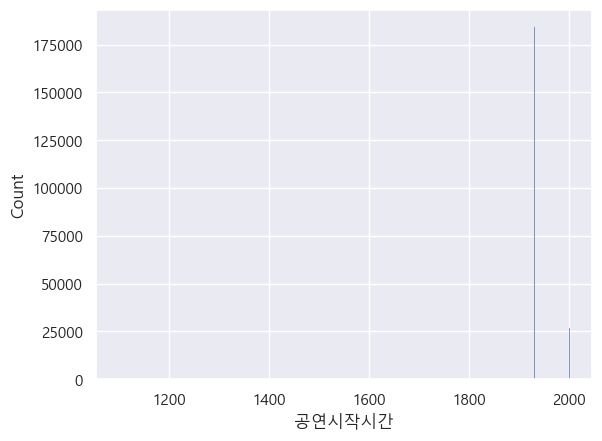

In [13]:
test = sns.histplot(df[df['예매취소여부'] == 0]['공연시작시간'], bins=30)

In [14]:
# for x in df.columns:
#  df[(df['할인내역'] == "일반")][x].hist(bins = 120)
#  plt.title(x)
#  plt.show()





In [15]:
# for x in df.columns:
#     # gender F 
#     df[(df['성별'] == 'M')][x].hist(bins = 123)
#     plt.title(x)
#     plt.show()

In [16]:
# for x in df.columns:
#     # ticket cancel is higher than 0
#     df[(df['예매취소여부'] == 0)][x].hist(bins = 123)
#     plt.title(x)
#     plt.show()

In [17]:
# members = [
#      'membership_type_1',
#  'membership_type_2',
#  'membership_type_3',
#  'membership_type_4',
#  'membership_type_5',
# ]

# querynotfree = []
# for x in members:
#     querynotfree.append(df[x] != "무료")

# querynotfree = np.logical_and.reduce(querynotfree)
# for x in df.columns:
#     df[querynotfree][x].hist(bins = 123)
#     plt.title(x)
#     plt.show()

In [18]:
df.corr(numeric_only=True)

,나이,최종예매가격,휴게시간,회원여부,member_yn
나이,1.000000,-0.043316,0.001732,-0.002937,NaN
최종예매가격,-0.043316,1.000000,-0.014658,0.048290,0.556076
휴게시간,0.001732,-0.014658,1.000000,0.067763,0.003525
회원여부,-0.002937,0.048290,0.067763,1.000000,-0.009793
member_yn,NaN,0.556076,0.003525,-0.009793,1.000000


In [19]:
# df['play_st_time'].hist(bins = 123)

In [20]:
# times=['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']

# times_categorized = pd.cut(df['예매 거래시간'], bins=25, labels=times)

# for x in times:
#     df[times_categorized == x]['장르'].hist(bins = 24)
#     plt.xlabel('나이 in {}'.format(x))
#     plt.show()

In [21]:
실예매자 = df['예매취소여부'] == 0
좌석들 = df[실예매자]['좌석번호'].value_counts().sort_index()
# df['좌석번호'].value_counts().sort_index().plot(kind='bar')
# #split index as multiindex 
# plt.gca().set_xticklabels([])
# plt.xticks(visible=False)
# plt.show()


좌석실구매자  = df[실예매자]['좌석번호'].value_counts().sort_index()
# 좌석실구매자.plot(kind='bar')
# plt.gca().set_xticklabels([])
# plt.xticks(visible=False)
# plt.title('실구매자 좌석 구매 횟수')
# plt.show()


not실예매자 = df['예매취소여부'] != 0
not좌석실구매자  = df[not실예매자]['좌석번호'].value_counts().sort_index()
# not좌석실구매자.plot(kind='bar')
# plt.gca().set_xticklabels([])
# plt.xticks(visible=False)
# plt.title('취소자의 좌석 구매 경향')
# plt.show()


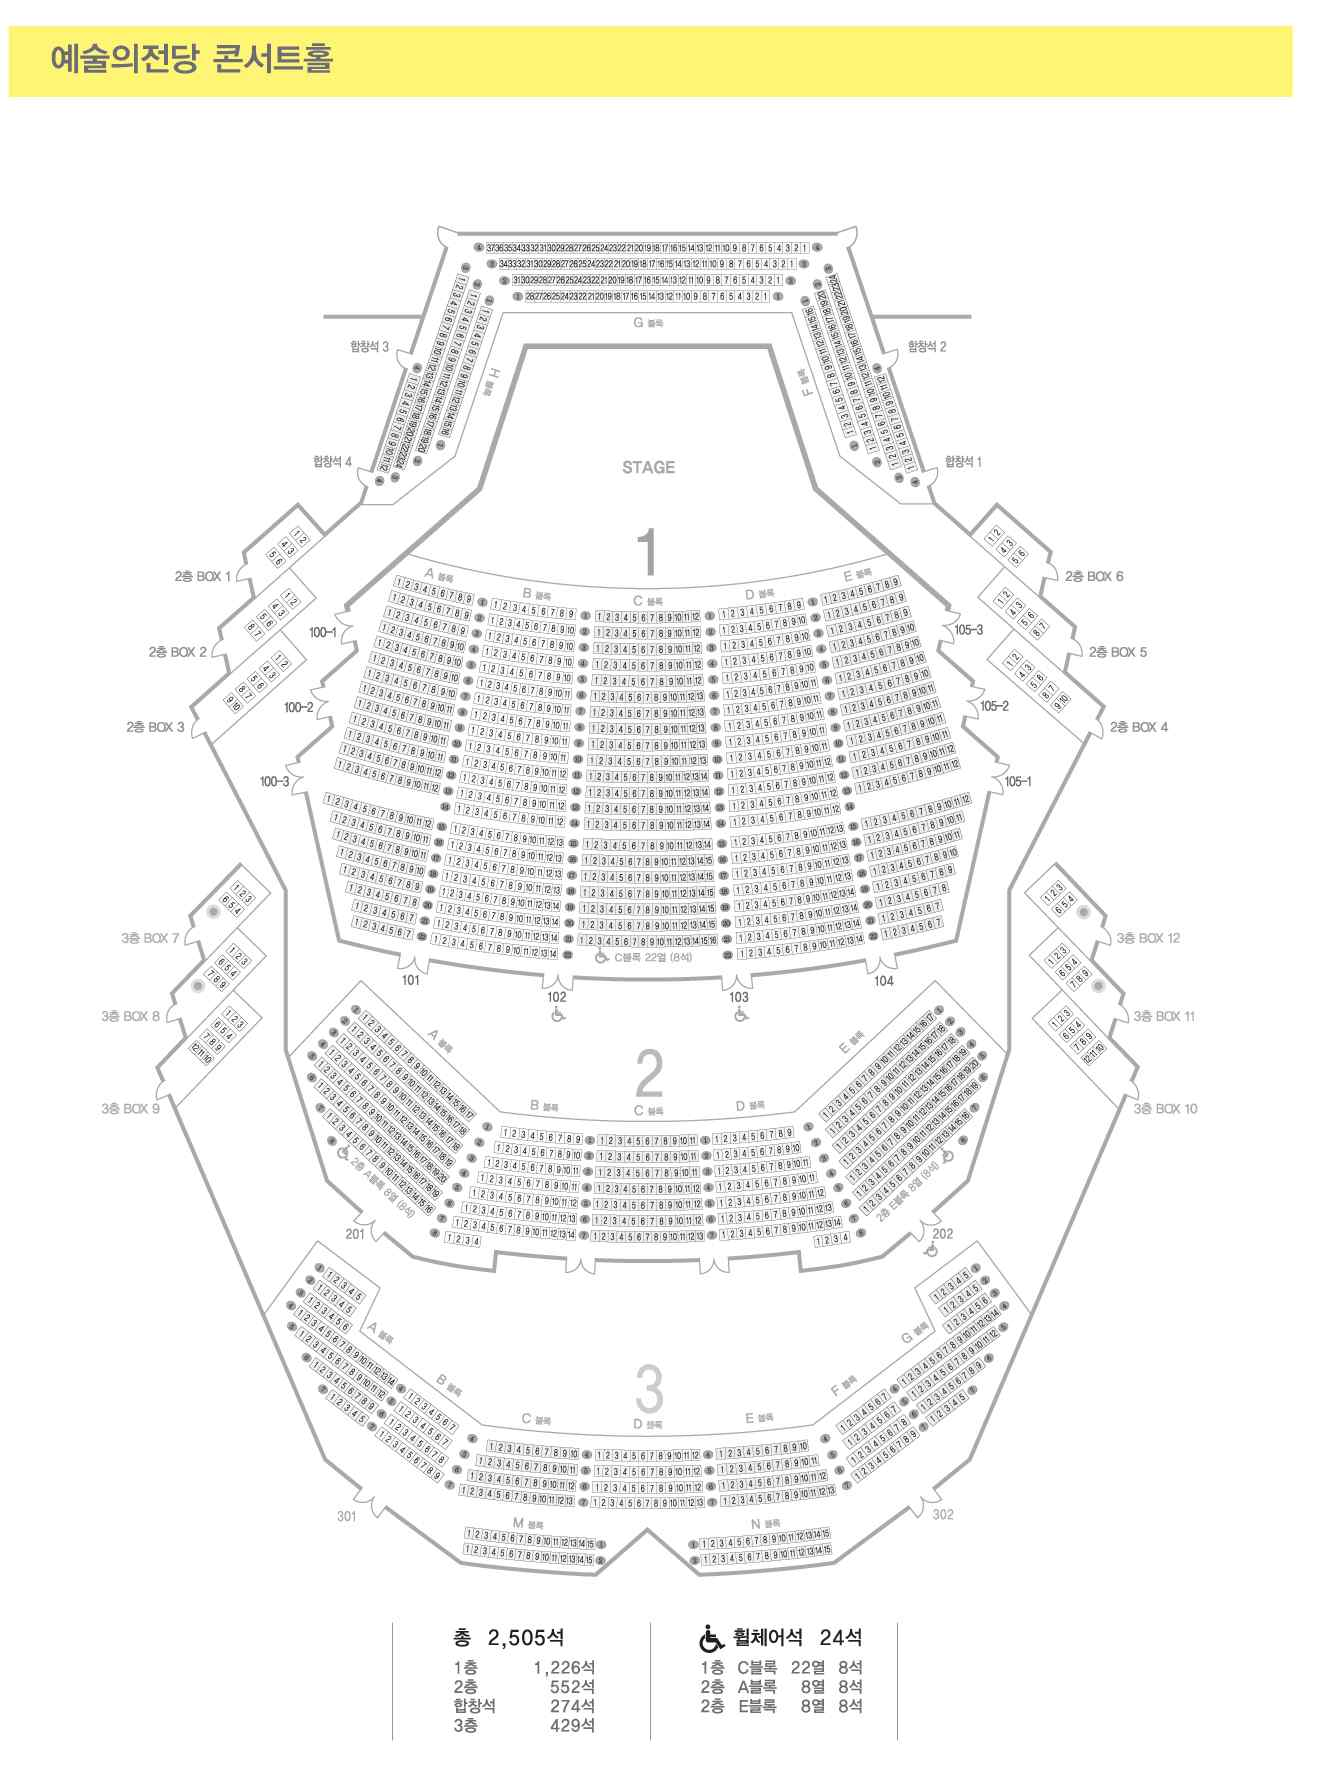

In [22]:
실구매자비율 = 좌석실구매자 / (not좌석실구매자 + 좌석실구매자)
# change name of column
실구매자비율.name = "비율"


In [23]:
실구매자최고최소 = 실구매자비율.sort_values(ascending=True)
print(좌석들['2층 E블록8열 12'])
print(실구매자비율.describe())


save11 = pd.concat([실구매자비율, 좌석들], axis=1)
seat_price = pd.DataFrame()
# add columns to new dataframe using various methods


seat_price['평균값'] = 0
seat_price['중간값'] = 0
# seat_price['최빈값'] = 0
for x in save11.index:
    seat_price.loc[x] = [df[(df['좌석번호'] == x) & (df['예매취소여부'] == 0)]['최종예매가격'].mean(numeric_only=True),
    df[(df['좌석번호'] == x) & (df['예매취소여부'] == 0)]['최종예매가격'].median(numeric_only=True),
    # df[(df['좌석번호'] == x) & (df['예매취소여부'] == 0)]['최종예매가격'].mode()[0]
    ]
save11 = pd.concat([save11, seat_price], axis=1)
result1 = save11




0
count    2505.000000
mean        0.765647
std         0.088885
min         0.492424
25%         0.700000
50%         0.773585
75%         0.834197
max         0.995633
Name: 비율, dtype: float64


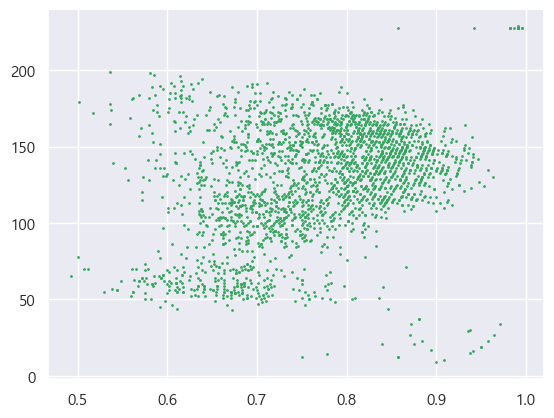

In [24]:


plt.scatter(실구매자비율, 좌석들, 1, c=randomColor())

# plt.plot(np.linspace(0.6, 1, 100), np.linspace(210, 150, 100), c='b')
# plt.plot(np.linspace(0.75, 1, 100), np.linspace(0, 400, 100), c='b')
# plt.plot(np.linspace(0.75, 1, 100), np.linspace(700, 300, 100), c='b')
plt.show()

In [25]:
result1

,비율,count,평균값,중간값
1층 A블록10열 1,0.850746,114,10929.824561,0.0
1층 A블록10열 10,0.851282,166,27319.277108,0.0
1층 A블록10열 11,0.806306,179,31363.128492,0.0
1층 A블록10열 2,0.863309,120,13933.333333,0.0
1층 A블록10열 3,0.852761,139,16280.575540,0.0
...,...,...,...,...
합창석 H블록4열 5,0.633663,64,30468.750000,22000.0
합창석 H블록4열 6,0.678161,59,26355.932203,24000.0
합창석 H블록4열 7,0.641304,59,34016.949153,27000.0
합창석 H블록4열 8,0.617021,58,35206.896552,22500.0


In [26]:
result1[result1['평균값'] > 0].corr(numeric_only=True)

regex = r"(.+?) ([a-zA-Z])블록([0-9]+)열 ([0-9]+)"
regexalter = r"(.+?) BOX([0-9]+) ([0-9]+)"
def extract_components(index_value):
    match = re.match(regex, index_value)
    # print(match)
    if match:
        return match.groups()
    else:
        match = re.match(regexalter, index_value)
        result = list(match.groups())
        result.insert(1, 'BOX')
        return tuple(result)
    

testindex = result1.index.tolist()
components = result1.index.map(extract_components)
compwithnames = pd.MultiIndex.from_tuples(components, names=['층', '블록', '열', '좌석'])


In [27]:
result1.index = compwithnames 

In [28]:
result1.reset_index(drop=False, inplace=True)
result1['열'] = result1['열'].astype(np.int32)

In [29]:
result1[result1['평균값'] > 0].sort_values(by='비율', ascending=False).tail(20)

,층,블록,열,좌석,비율,count,평균값,중간값
2351,합창석,G,2,24,0.559140,52,37346.153846,20500.0
681,1층,C,3,3,0.557756,169,61017.751479,40000.0
1953,3층,C,4,6,0.556522,128,31203.125000,24000.0
2000,3층,D,4,5,0.552846,136,32257.352941,24000.0
2358,합창석,G,2,30,0.548673,62,40564.516129,28500.0
2348,합창석,G,2,21,0.543689,56,46821.428571,47000.0
2429,합창석,G,4,36,0.543689,56,35500.000000,26000.0
1385,2층,BOX,3,1,0.538760,139,38697.841727,35000.0
2380,합창석,G,3,22,0.537736,57,38964.912281,28000.0
617,1층,C,1,2,0.537037,174,61097.701149,40000.0


<Axes: >

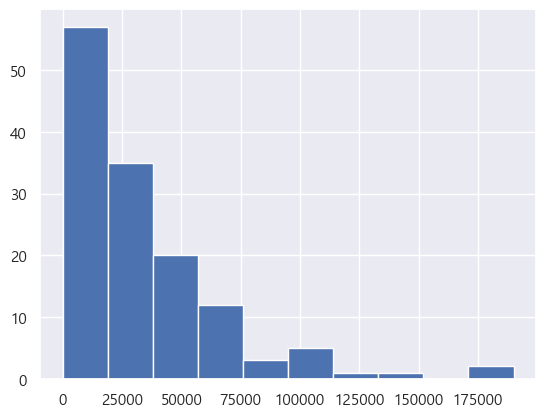

In [30]:
df[(df['좌석번호'] == '3층 D블록4열 5') & (df['예매취소여부'] == 0)]['최종예매가격'].hist(bins=10)


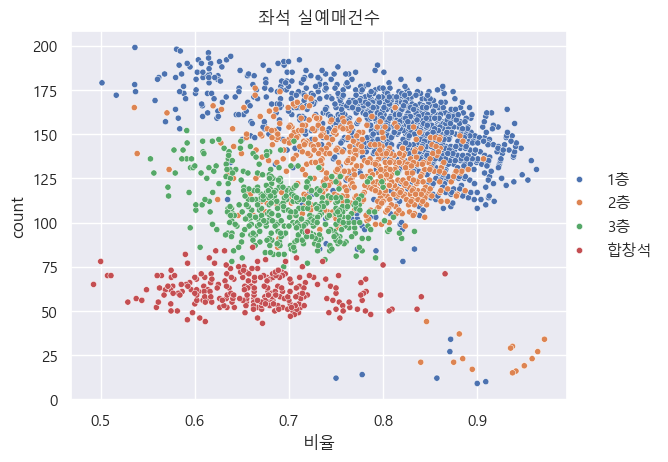

In [31]:
total = sns.scatterplot(
    x="비율", 
    y="count", 
    data=result1[result1['평균값'] > 0], 
    legend='auto', 
    hue="층", 
    # style='열',
    s=20
)
total.set_title("좌석 실예매건수")

# sns.title("전체 좌석 비율")
sns.move_legend(
    total,
    "center right",
    bbox_to_anchor=(1.2, .5), 
    title=None, 
    frameon=False
)
plt.savefig('test.svg')
plt.show()

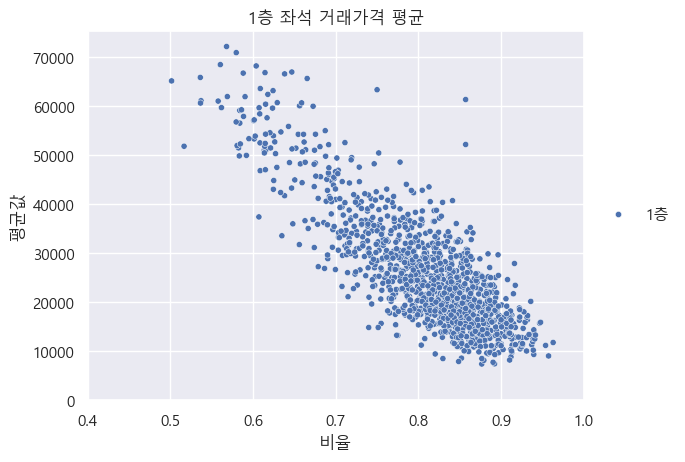

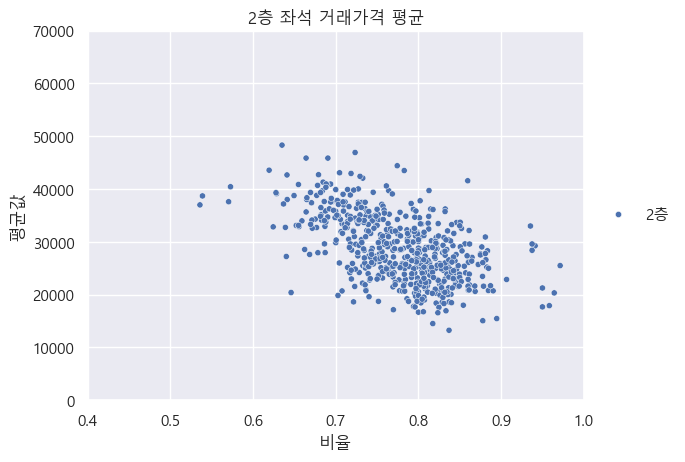

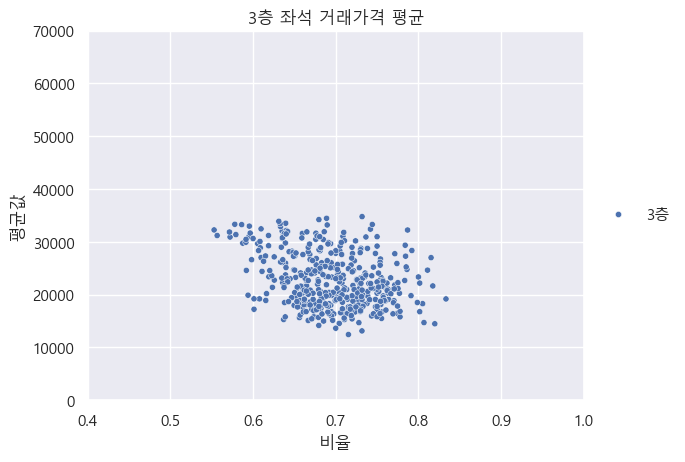

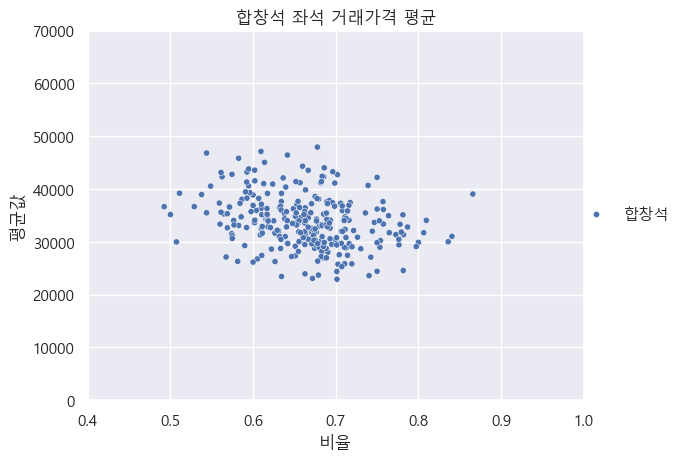

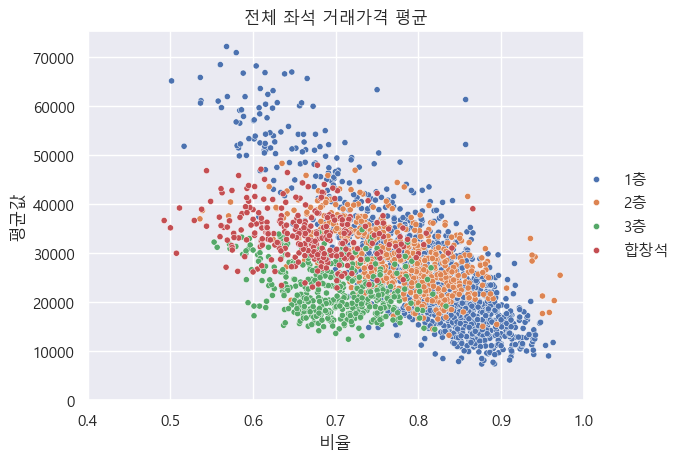

In [32]:
palette=['green','blue','dodgerblue','red']
def plot_scatter(flag = False, 층수 = ''):
    total = sns.scatterplot(
        x="비율", 
        y="평균값", 
        data=result1[(result1['평균값'] > 0) 
                    & (result1['층'] == 층수 ) if flag == True else (result1['평균값'] > 0)
                    ], 
        legend='auto', 
        hue="층", 
        # style='열', 
        s=20,
        # palette = random.choice(palette)
        
    )
    total.set_title(f"{층수 if flag == True else '전체'} 좌석 거래가격 평균")
    total.set_xticks(np.linspace(0.4, 1, 7))
    total.set_yticks(np.linspace(0, result1['평균값'].max() // 10000 * 10000, 8))
    # sns.title("전체 좌석 비율")
    sns.move_legend(total,"center right",
        bbox_to_anchor=(1.2, .5), title=None, frameon=False)
    plt.show()


for x in result1['층'].unique():
    plot_scatter(True, x)
plot_scatter()



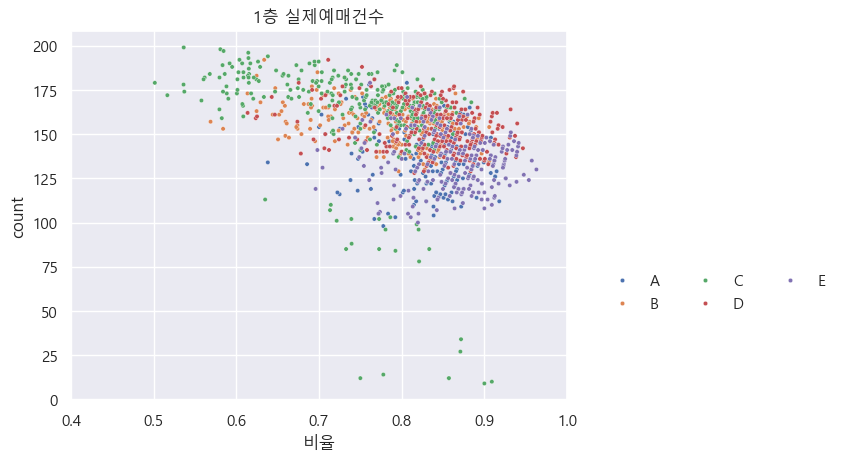

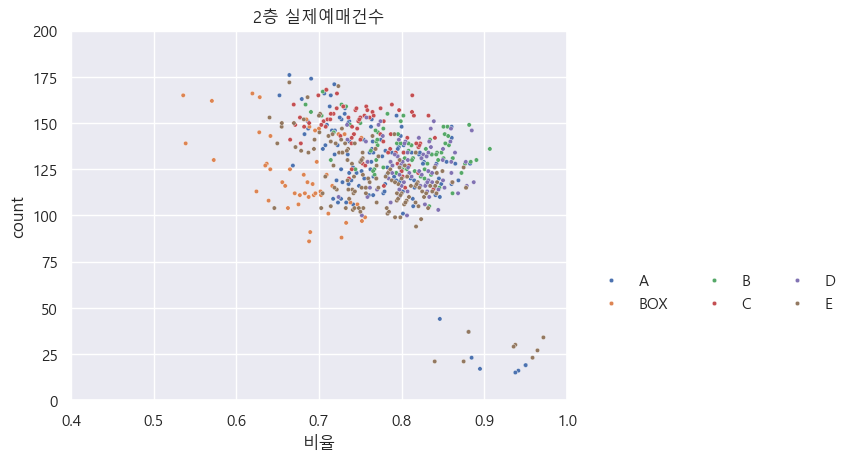

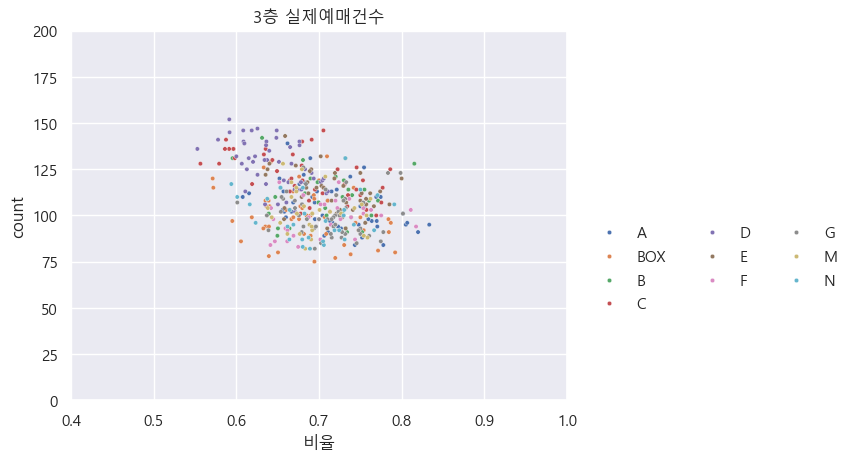

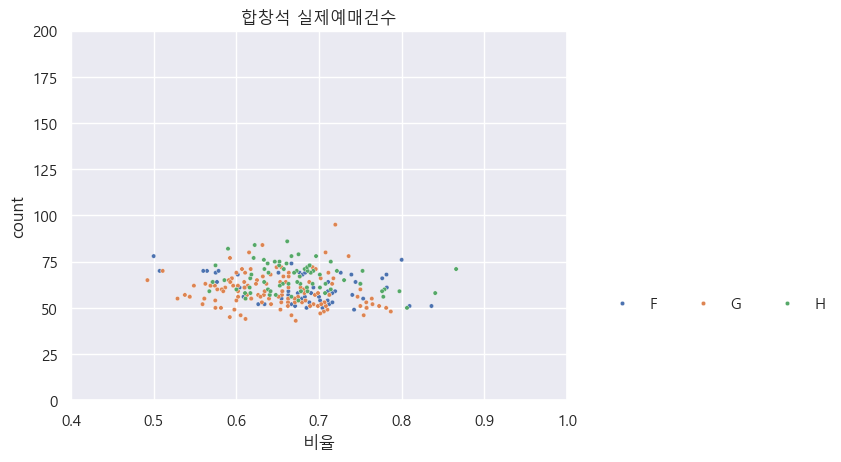

In [33]:
for floorlevel in result1['층'].unique():
    target = sns.scatterplot(
        x="비율", 
        y="count", 
        data=result1[(result1['평균값'] > 0) 
                     & (result1['층']== floorlevel)
                     ],
        legend='full', 
        hue="블록", 
        # pointsize='평균값',
        s=10
        )
    target.set_title("{} 실제예매건수".format(floorlevel))
    target.set_xticks(np.linspace(0.4, 1, 7))
    target.set_yticks(np.linspace(0, 200, 9))
    sns.move_legend(target,"lower center",
        bbox_to_anchor=(1.3, .2), ncol=3, title=None, frameon=False)
    plt.show()
    # result1[(result1['평균값'] > 0) & (result1['층']== '1층')].corr(numeric_only=True)
    

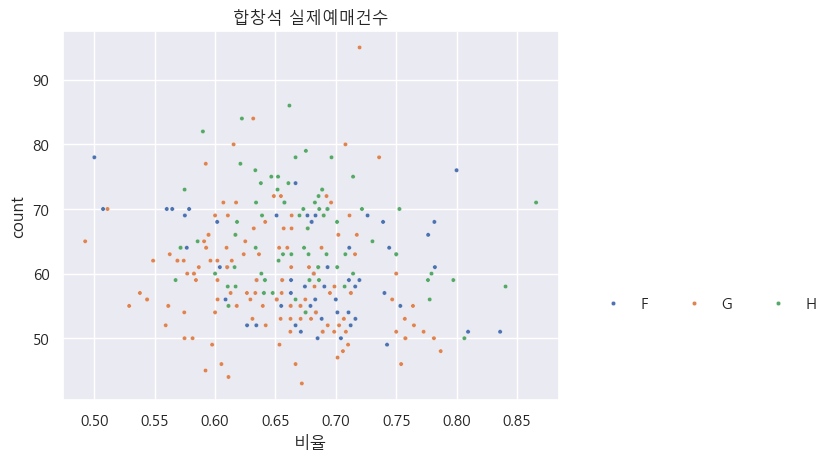

In [34]:
target = sns.scatterplot(x="비율", y="count", data=result1[(result1['평균값'] > 0) & (result1['층']== floorlevel)], legend='full', hue="블록", s=10)
target.set_title("{} 실제예매건수".format(floorlevel))
sns.move_legend(target,"lower center",
    bbox_to_anchor=(1.3, .2), ncol=3, title=None, frameon=False)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12376\2925462543.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  target = sns.scatterplot(


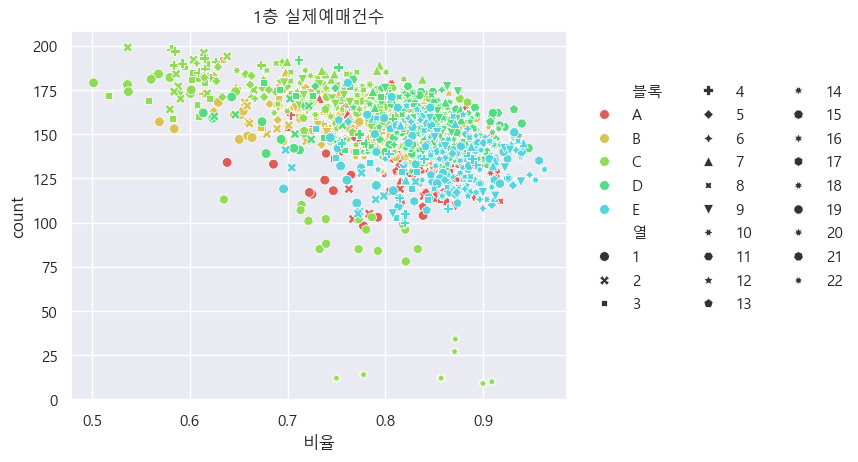

In [35]:
floorlevel = "1층"

target = sns.scatterplot(
    x="비율", 
    y="count", 
    data=
    result1[(result1['평균값'] > 0) 
            &(result1['층']== floorlevel) 
            # &(result1['열'] == i)
            ], 
    legend='full', 
    hue="블록", 
    style="열",
    s=50, 
    palette=sns.color_palette("hls", 8)
    )
target.set_title("{} 실제예매건수".format(floorlevel))
sns.move_legend(target,"lower center",
    bbox_to_anchor=(1.3, .2), ncol=3, title=None, frameon=False)
plt.show()

In [36]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   층       2509 non-null   object 
 1   블록      2509 non-null   object 
 2   열       2509 non-null   int32  
 3   좌석      2509 non-null   object 
 4   비율      2505 non-null   float64
 5   count   2509 non-null   int64  
 6   평균값     2505 non-null   float64
 7   중간값     2505 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 147.1+ KB
